In [114]:
!pip install ucimlrepo

In [115]:
import os
import pickle
import plotly.express as px

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from ucimlrepo import fetch_ucirepo
from yellowbrick.regressor import ResidualsPlot

## Carregamento dos dados

In [116]:
parkinsons_telemonitoring = fetch_ucirepo(id=189)

In [117]:
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets

Este conjunto de dados é composto por uma variedade de medições biomédicas de voz de 42 pessoas com Parkinson em estágio inicial, recrutadas para um ensaio clínico de seis meses de um dispositivo de telemonitoramento para monitoramento remoto da progressão dos sintomas. As gravações foram capturadas automaticamente nas casas dos pacientes. As colunas da tabela contêm número do sujeito, idade do sujeito, gênero do sujeito, intervalo de tempo desde a data de recrutamento inicial, UPDRS motor, UPDRS total e 16 medidas biomédicas de voz. Cada linha corresponde a uma das 5.875 gravações de voz desses indivíduos. O principal objetivo dos dados é prever as pontuações do UPDRS motor e total ('motor_UPDRS' e 'total_UPDRS') a partir das 16 medidas de voz.

In [118]:
X

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0


In [119]:
X.loc[:, "sex"] = X["sex"].map({0: "male", 1: "female"})

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19916\1975346912.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['male' 'male' 'male' ... 'male' 'male' 'male']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "sex"] = X["sex"].map({0: "male", 1: "female"})


In [120]:
y

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375
...,...,...
5870,22.485,33.485
5871,21.988,32.988
5872,21.495,32.495
5873,21.007,32.007


In [121]:
data = pd.concat([X, y["total_UPDRS"]], axis = 1)
data

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,male,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,male,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,male,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,male,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,male,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,male,33.485
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,male,32.988
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,male,32.495
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,male,32.007


In [122]:
data.to_csv("parkinsons.csv", index=False)

In [123]:
dataset = pd.read_csv("parkinsons.csv")
dataset.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,male,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,male,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,male,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,male,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,male,36.375


In [124]:
dataset.describe()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,29.018942
std,8.821524,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,10.700283
min,36.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,7.000000
25%,58.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,21.371000
50%,65.000000,91.523000,0.004900,0.000034,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,27.576000
75%,72.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,36.399000
max,85.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,54.992000


In [125]:
dataset.isnull().sum()

age              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
sex              0
total_UPDRS      0
dtype: int64

In [126]:
dataset.corr(numeric_only=True)

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
age,1.000000,0.019884,0.023071,0.035685,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790,0.310290
test_time,0.019884,1.000000,-0.022837,-0.011349,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563,0.075263
Jitter(%),0.023071,-0.022837,1.000000,0.865574,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849,0.074247
Jitter(Abs),0.035685,-0.011349,0.865574,1.000000,0.844622,0.790534,0.844626,0.649041,0.655866,0.623825,0.621397,0.589992,0.623823,0.699954,-0.706420,0.547097,0.352264,0.787848,0.066926
Jitter:RAP,0.010255,-0.028888,0.984181,0.844622,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652,0.064015
Jitter:PPQ5,0.013199,-0.023290,0.968214,0.790534,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491,0.063352
Jitter:DDP,0.010258,-0.028876,0.984184,0.844626,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660,0.064027
Shimmer,0.101554,-0.033870,0.709791,0.649041,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709,0.092141
Shimmer(dB),0.111130,-0.030962,0.716704,0.655866,0.685551,0.734591,0.685556,0.992334,1.000000,0.968015,0.976373,0.936338,0.968014,0.798077,-0.802496,0.472409,0.126111,0.635163,0.098790
Shimmer:APQ3,0.098912,-0.029020,0.664149,0.623825,0.650226,0.676711,0.650228,0.979828,0.968015,1.000000,0.962723,0.885695,1.000000,0.732736,-0.780697,0.436878,0.130735,0.576704,0.079363


<Axes: >

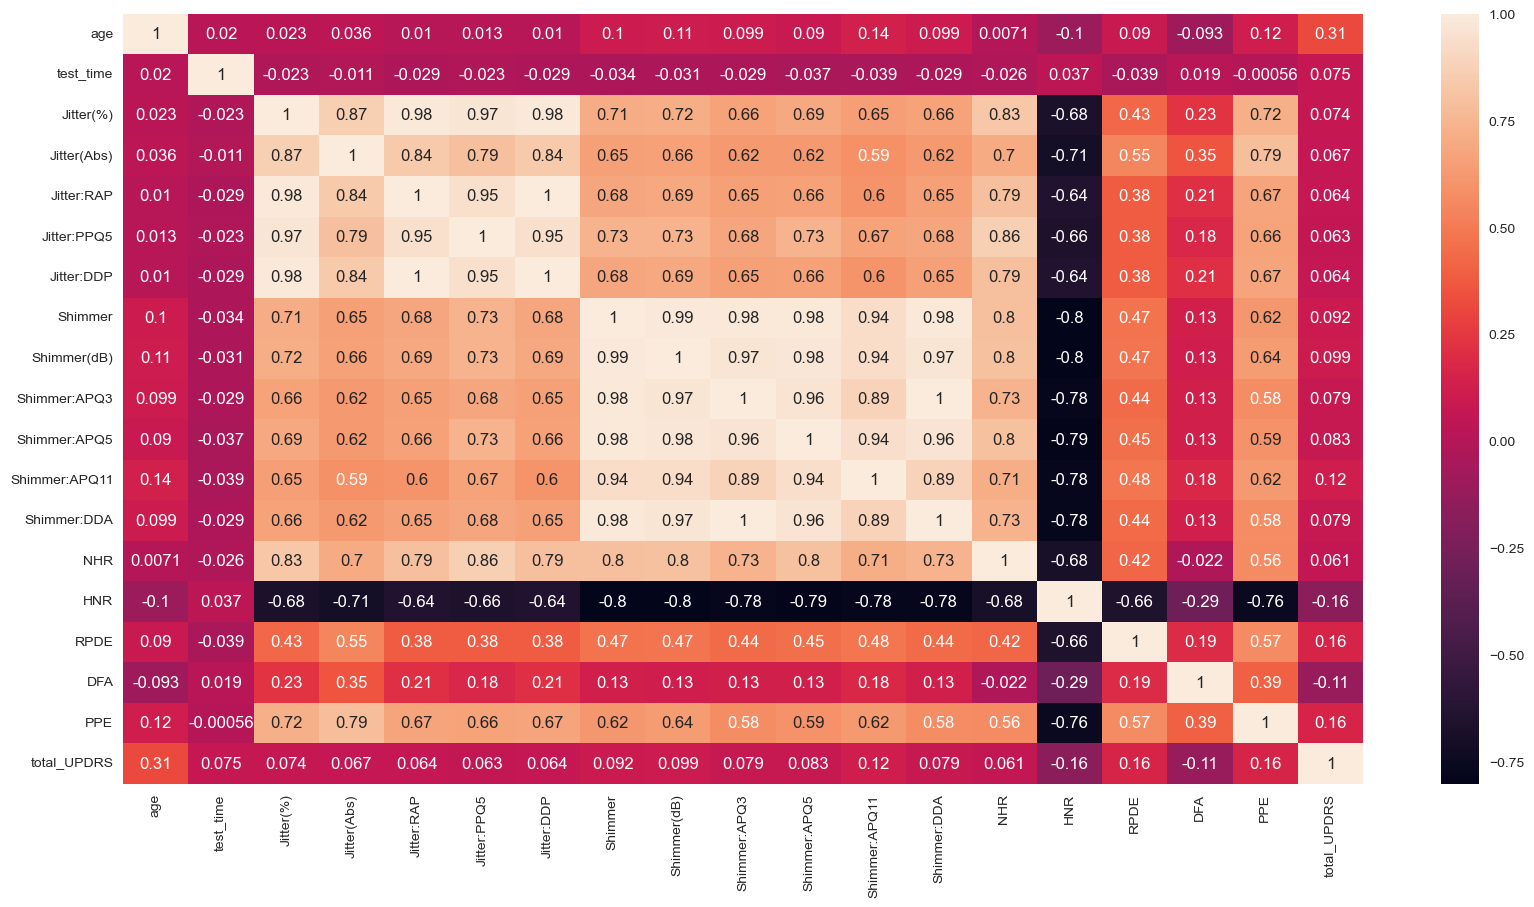

In [127]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(dataset.corr(numeric_only=True), annot = True)

### Tratamento dos valores

In [128]:
dataset["sex"] = dataset["sex"].map({"male": 0, "female": 1})

In [129]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
X_train.shape, X_test.shape

((4112, 19), (1763, 19))

In [132]:
y_train.shape, y_test.shape

((4112,), (1763,))

In [133]:
with open("parkinsons.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [135]:
lr.coef_

array([ 3.02608873e-01,  1.66686519e-02, -1.79667146e+02, -6.14392478e+04,
       -1.06022657e+04, -3.26912586e+02,  3.94010438e+03,  1.19288012e+02,
       -7.70311751e+00, -2.31287558e+04, -1.95429669e+01,  6.16080694e+01,
        7.62420782e+03, -1.33018773e+01, -6.52025291e-01,  4.52236586e+00,
       -3.15229782e+01,  1.67558248e+01, -2.67536956e+00])

In [136]:
lr.intercept_

40.42710513073658

In [137]:
lr.score(X_train, y_train)

0.17402909417065604

In [138]:
lr.score(X_test, y_test)

0.180073289269022

In [139]:
y_prev = lr.predict(X_train)

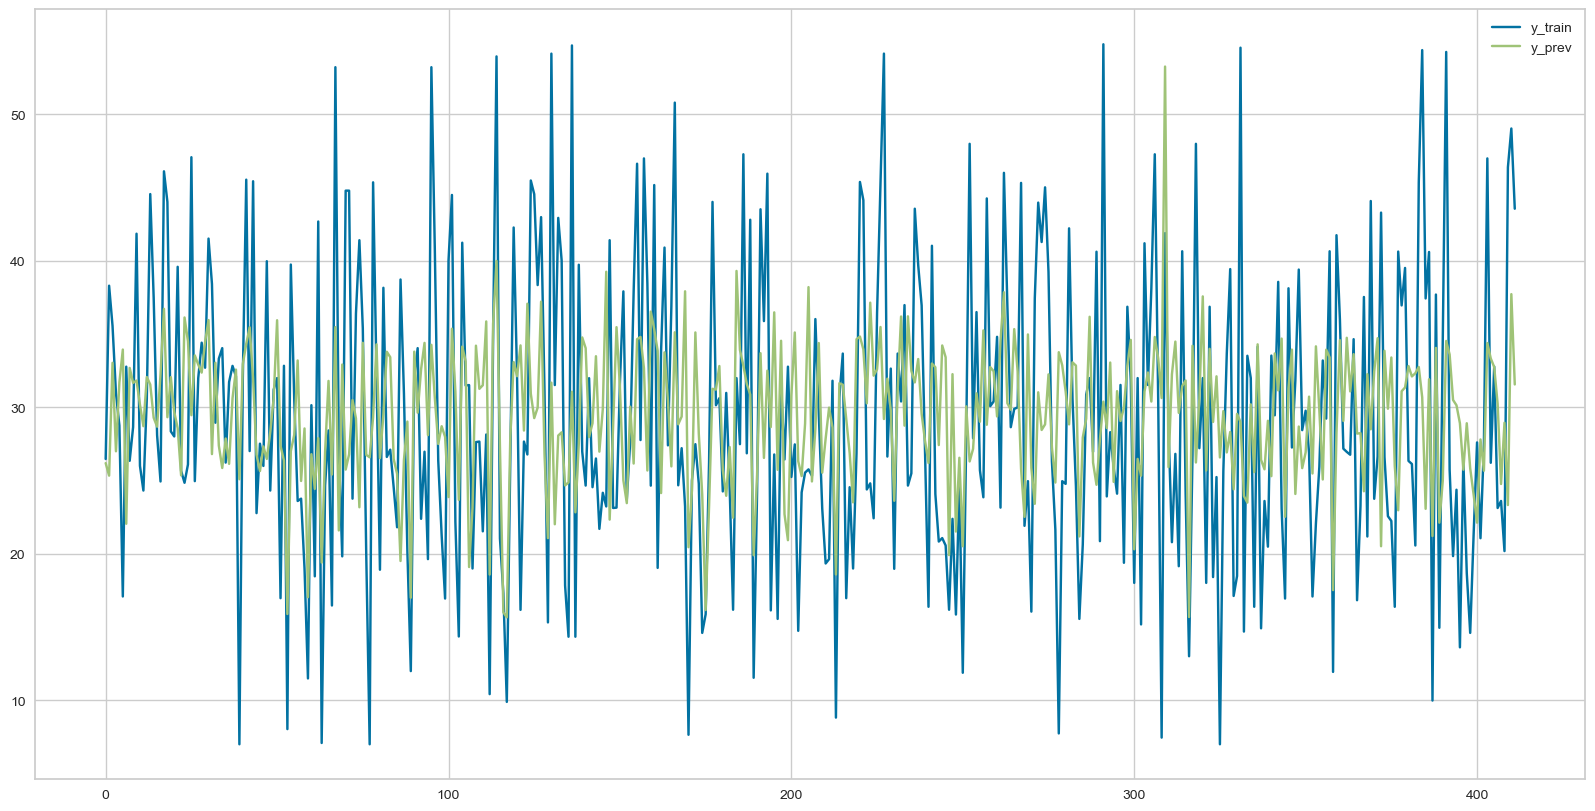

In [140]:
plt.figure(figsize=(20, 10))
plt.plot(y_train[::10], label="y_train")
plt.plot(y_prev[::10], label="y_prev")
plt.legend();

A figura indica que as previsões não foram boas.

In [150]:
y_prev = lr.predict(X_test)

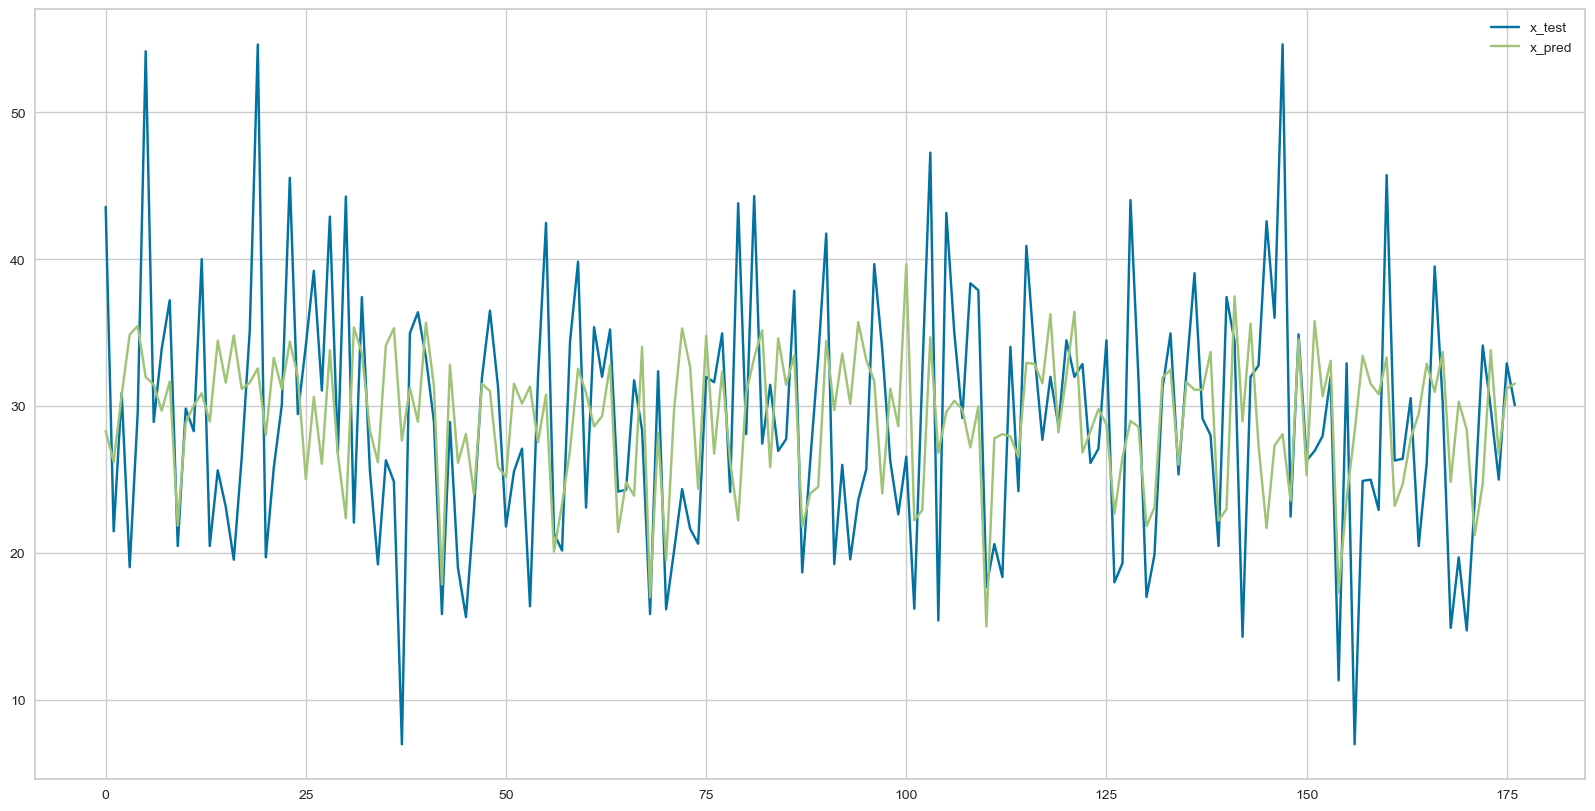

In [151]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[::10], label = "x_test")
plt.plot(y_prev[::10], label = "x_pred")
plt.legend();

In [143]:
abs(y_test - X_prev).mean()

8.072629363284323

In [144]:
mean_absolute_error(y_test, X_pred)

8.072629363284323

In [152]:
mean_squared_error(y_test, prev)

92.22558174712306

In [145]:
np.sqrt(mean_squared_error(y_test, prev))

9.603415108549825

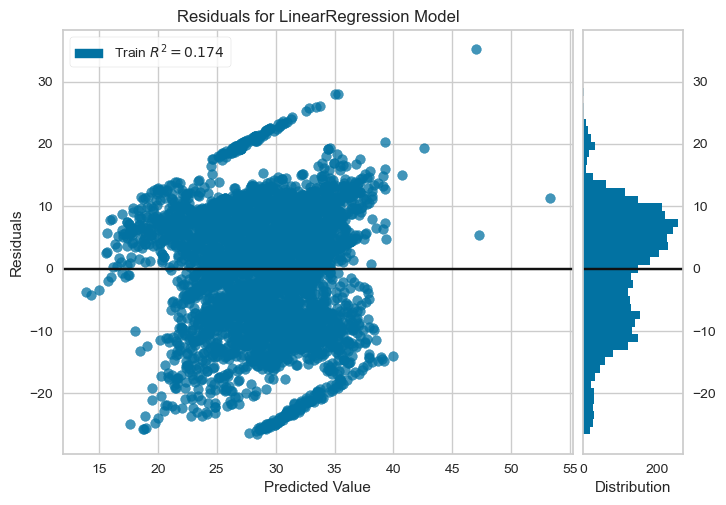

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [153]:
visu = ResidualsPlot(lr)
visu.fit(X_train, y_train)
visu.poof()